# Some very basic things to do in bash

## The terminal

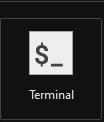

Interface to send commands to be executed to the computer.

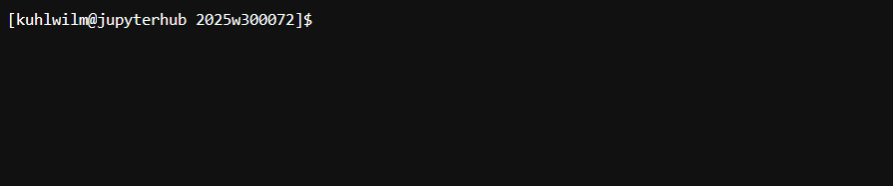

Syntax: command_name -options argument

Separated by **space** - make sure to correctly place them

Command usually ends with a new line or semicolon

Here, you will see `code` with grey background - you can try this on the command line.

**This course itself is not meant to learn basic knowledge on the command line and bash. If this is missing, you need to go through this manual in order to follow the course at all!**


## Simple navigation on the command line

Files are in directories, in a hierarchical file system.

The terminal is used to navigate, the language is **bash** - a command line interpreter. Many things are similar to `R`, such as defining variables/objects, but others are not identical. E.g. if you type "hello" in R, it would repeat after you. However, in bash: `hello` leads to an error, so you need a specific command: `echo "hello"`.

* How do we get into the next subdirectory?

`cd ~/appladmix/notebooks` - change directory

* How do we go back if we don't know (or want to know) what is the upper level?

`cd ..` - go one directory upwards

* How do we go back to start (a home directory)?

`cd `

* How do we know what is in a directory?

`ls` - list files

`ls -lh` - list files, with more information and human-readable numbers

* How do we create a new directory?

`mkdir newd` - make directory


## Tricks

Go to: `cd ~/appladmix/notebooks/0_basics/data`

The **wildcard**: \* - The asterisk can be used instead of everything

`ls file*`

**Autocomplete**: use the TAB key to autocomplete unique stuff

What did you just do before? There is a history of commands, use the **cursor keys**: **↑** and **↓** to scroll through history, or even say `history`!

Quotation marks need to be plain text quotation marks: \' or \"

Avoid things such as “ or ´ - uninterpretable!

**Get help**: `--help` or `-h`

Or: ask google, ask chatGPT, ask other robots!


## Looking at files

* How to look what is in a file?

`more fileA.txt` – scroll thorugh file -- exit with `Q` key 

`less fileA.txt` – look at file -- exit with `Q` key 

`cat fileA.txt` – concatenate = print file line by line to the command line

* If I'm afraid the file is too big (or I know because of ls -l) - can I do something?

How about counting the words?

`wc fileA.txt` – word count of file 

`wc -l fileA.txt` – line count of file

Maybe look at the first few lines and see what is there?

`head fileA.txt` – print first 10 lines of file

`head -n 3 fileA.txt` – print first 3 lines

Or the last few lines?

`tail fileA.txt` – print last 10 lines of file

`tail -n 3 fileA.txt` – print last 3 lines of file


## Manipulating files

Without my cursor, can I **move stuff around**?

Yes, as usual, using commands!
But **caution**: files are irreversibly overwritten if they already exist - without asking!

* You may create an identical copy with a different name (or at a different location).

`cp fileA.txt fileB.txt` - copy file

* You may even move things, which changes the name (or location) of the file, but keeps only one copy.

`mv fileB.txt fileC.txt` - move file

* Finally, you can remove files.

`rm fileC.txt` - remove file

Again: caution, there is *no trash bin*!

We may look at permissions with `ls -lh`. That means, what are you allowed to look at, change, or delete.


## Loops 

You can perform the same command multiple times. Very simple:

`for num in 1 2 3; do echo $num; done`

If you have the same task more than once, you loop!

Of course, you may just type 1 2 and 3, but not {1..5984}...

An example: 

`for num in 1 2 3; do cp fileA.txt file$num.txt; done`

* Let's check the output!


## Subsetting of files (part I)

Of course, not just looking at files, but retrieving subsets or even changing the content would be useful.
First, we subset a file, that is, we grab ("grep") something (a pattern):

`grep "apple" fileA.txt`

This works for the opposite of the pattern:

`grep -v "apple" fileA.txt`

Or look at this:

`grep -c "apple" fileA.txt`

* What is happening here?

## Regular expressions

Let's have a closer look at what can be a "pattern". Maybe we don't want to search for a precise pattern, but rather something of a certain type, something that includes several possible patterns etc. For this, we can use "regular expressions".

For example, in grep (but also other tools):

*Common types*

`|` = or

`.` = any character

`^` = starting position

`$` = end position

`[ ]` = defined ranges, e.g. any digit \[0-9\], some letters \[acde\]

`\` = escape: meaning that a letter behind this character is a “metacharacter“; e.g. using `\s` searches for "spacings" (space key, tabs...), `\n` for new lines

*Some examples*

`grep -E "apple|pear" fileA.txt` = any line with “apple“ or “pear“

`grep -E "[aoi]pple" fileA.txt` = any line with “apple“ or “opple“ or “ipple“

`grep -E ".pple" fileA.txt` = any line with any character followed by “pple“

`grep -E "^3" fileA.txt` = any line starting with “3“


## Subsetting of files (part II)

Files have rows and columns (i.e. we expect them to be tabular, matrices, data frames). The grep command is searching for pattern in each row and spits it out to the terminal.

Now, we may want to subset the table by columns. This means, we "cut" certain columns for specific fields:

`cut -f2-3 fileA.txt`

As tables can come in different shapes, it might be that we want to define delimiters. This is done here:

`cut -f2-3 -d " " fileA.txt`

Well, this is not searching for a pattern, as we assume subsetting by columns is categorical, while rows contain specific information. Hence, your tables better be shaped that way.

Now try this command:

`grep -v "apple" fileA.txt | cut -f2-3 > fileE.txt`

* What is happening here?

## Piping and streams

Piping means handing over the result of one command into another command. So, above you do a `grep` on a file first, the output is used for the next command `cut`, without printing to the terminal, without intermediate files.

Now, we need to understand what a command does. If you define a file, it reads in the file - internally, this is processed as the input. If the command receives it from a previous command, this is the **"standard input"** stream.

If you tell the command to write into a file, this is the output. Otherwise, it may be printed to the terminal. If you hand it over to another file, it is simply called **"standard output"** stream.

Commands also have another stream for error messages (which obviously should not be written into the output file), which is called the **"standard error"**.

The good thing is that this can be controlled, we can define these streams. The commands so far did not require it (their streams are implicit, but other tools may need to define it.

Here an example, making the streams explicit:

`cat fileA.txt | grep -v "apple" - - 2> error.txt | cut -f2-3 > fileE.txt`

Standard input: the input a program takes (from the pipe? or a file?)

Standard output: where to put the output (into the command line? to a file?)

Standard error: where to put any error messages (usually, on the command line)

## Subsetting of files (part III)

Sometimes, `grep` and `cut` are not enough. Files may be too complex, you want to select specific things only in specific columns, etc.

There are some solutions to this. One is called `awk`. This is a small *programming language* that is useful for filtering data, even complex and line by line. For example, genotype data where each line is one position in the genome.

We only get the third column here:
`awk '{ print $3 }' fileA.txt`

More complex:

`awk '$2=="apple" { print $3 }' fileA.txt`

`awk '$1>=15 { print $0 }' fileA.txt`

`awk 'length($2)==4 { print $2,$3 }' fileA.txt`

This cannot be a complete introduction to `awk`, below are some more examples. In any case, it is useful to know it for filtering of text files!


## File manipulation: sorting

Sorting just means to look at each row (!) and sort them by their beginning.

`sort fileA.txt`

If you like to take numeric values into account:

`sort -n fileA.txt`

You may also restrict your files to only unique observations:

`uniq fileA.txt`

Try this:

`sort fileA.txt | uniq`

* What is happening there?



## Compression

Working with sequencing data means working with files that contain millions of lines. Efficient compression is very important for large files. But it means you often cannot just run the same commands, at least in many cases.

Compressed files will usually have a file extension such as `.tar` or `.gz` or `.tar.gz`.

Unfortunately, parameters are cryptic, especially when tar is involved: Here is a typical way to decompress it:

`tar -zxvf fileA.tar.gz`

If a file is just compressed with gzip, the simple command is `gunzip`:

`gunzip fileB.txt.gz`

Look at the file! Is it the same as `fileA.txt`?

Some programs can handle compressed files (`less` does the same as `zless`, but `wc` will give you the lines of compressed data).


# Doing filtering tasks

As mentioned before, `awk` is very useful to filter datasets. We learned that it is a small programming language. So, using `awk` already means you are doing programming - congrats! Let's do a bit more with it.

Usually, you do `awk` followed by a string contained in quotation marks `''` and the file name (or standard input).

* What was "standard input" again?

Within the quotation marks, certain structures have to be respected. For example, you usually set the filtering parameters first, e.g. a certain column (`$1` means column 1) should match a pattern (`=="orange"` means being equal to "orange"). Then, you define what it should spit out, surrounded by braces (`{ print $1 }` means the program outputs the first column only. You see that there is a syntax and logical order of things. The good thing is that `awk` can be used on the command line to process any text file.

Here is one possible [cheatsheet](https://www.shortcutfoo.com/app/dojos/awk/cheatsheet); you may use Google for more, or ask an LLM.

All of this is extremely useful when working with sequencing data as it comes out of the sequencing platform - because you deal with very large textfiles, but within each text file, there is a structure. You make use of this structure by querying something from a file. Hence, these tools are fundamental for doing modern genetic and genomic work.

## Matching with awk

What can we do? We can try to match things.

`awk '$2=="orange" { print $0 }' fileA.txt`

Now compare

`awk '$2=="apple" { print $0 }' fileA.txt | awk '$5== "B" {print $0}'`

and

`awk '$2=="apple" && $5=="B" { print $0 }' fileA.txt`

* What is the difference?

## Defining separators

Maybe we need to be explicit about separators...

`awk -v FS="\t" '$2=="apple" && $5=="B" { print $0 }' fileA.txt`

and

`awk -v FS="\t" '$2=="apple" { print $0 }' fileA.txt | awk -v FS="[ ]" '$2=="B" { print $0 }'`


## Pattern search and regular expressions

Now, search for something that is contained (though not exact)?

`awk '$2=="apple" { print $0 }' fileA.txt`

`awk '$2~"apple" { print $0 }' fileA.txt`

* What is the difference?

Now more using of regular expressions:

`awk '$2~"[aoi]pple" { print $0 }' fileA.txt`

and

`awk '$2~"^[aoi]pple" { print $0 }' fileA.txt`

Note that `awk` is blind to the function of a header! That needs to be considered when applying this tool.


* If you have a header, what may you do?

Caution with this symbol: `|`

`awk '$5~"A|C" { print $0 }' fileA.txt`

How about taking the opposite?

`awk '$5!~"A|C" { print $0 }' fileA.txt`

`awk '$5!="B" { print $0 }' fileA.txt`


## Comparing numbers

We can filter by comparison!

`awk '$1>=15 { print $0 }' fileA.txt`

`awk '$6>1.1 && $6<=2 { print $0 }' fileA.txt`

* Finally, we try to match to the asterisk `*`. Does this work?

## Special characters are special

`awk '$6==* { print $0 }' fileA.txt`

Or this?

`awk '$6=="*" { print $0 }' fileA.txt`

Or this: 

`grep "." fileA.txt`

versus this: 

`grep "\." fileA.txt`
